1.	Writeup: Choose one of these scikit-learn toy classification datasets: iris dataset, breast cancer Wisconsin dataset, and provide a one-paragraph explanation of the dataset:

https://scikit-learn.org/stable/datasets/toy_dataset.html

1.	Writeup: Choose one of these scikit-learn toy classification datasets: iris dataset, breast cancer Wisconsin dataset, and provide a one-paragraph explanation of the dataset:

https://scikit-learn.org/stable/datasets/toy_dataset.html

                      Breast Cancer Wisconsin dataset

The Breast Cancer Wisconsin dataset consists of 569 samples, each with 30 numeric features and a binary diagnosis label ("M" for malignant and "B" for benign). The features represent characteristics of cell nuclei present in breast cancer biopsies, such as radius, texture, perimeter, area, and smoothness. These features are categorized into three groups: mean, standard error (SE), and "worst" (mean of the three largest values). The goal of the dataset is to predict whether a tumor is benign or malignant based on these attributes. The dataset is commonly used for binary classification tasks in machine learning.



The code in this notebook was inspired and partially copied/derived from these articles:

https://towardsdatascience.com/lime-vs-shap-which-is-better-for-explaining-machine-learning-models-d68d8290bb16

LIME vs. SHAP: Which is Better for Explaining Machine Learning Models?
Two of the most popular Explainers compared
Dario Radečić, Dec 14, 2020

https://towardsdatascience.com/squeezing-more-out-of-lime-with-python-28f46f74ca8e
Squeezing More out of LIME with Python
How to create global aggregations of LIME weights
Conor O'Sullivan, May 4 2022

However many of the features do not work for MLP.

2.	Coding: Fetch the dataset as a dataframe



In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset
raw_data = load_wine(as_frame=True)
wine_data = raw_data.frame

# Map the target variable to class names for better readability
wine_data['class'] = wine_data['target'].map(lambda ind: raw_data['target_names'][ind])

# Drop the original target column (if needed)
wine_data = wine_data.drop('target', axis=1)

# Display the dataset
wine_data.head()


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline    class  
0                          3.92   1065.0  class_0  
1                          3.40   1050.0  class_0  
2                          3.17   1185.0  class_0  
3                          3.45   1480.0  class_0  
4                          2.93    735.0  class_0

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
#Download wine dataset as a DataFrame
raw_data = load_wine(as_frame=True)
wine_data = raw_data.frame


#Remove target Variable
wine_data['class']=wine_data['target'].map(lambda ind: raw_data['target_names'][ind])
wine_data= wine_data.drop('target', axis=1)

type(wine_data)
print(wine_data.info())
print(wine_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

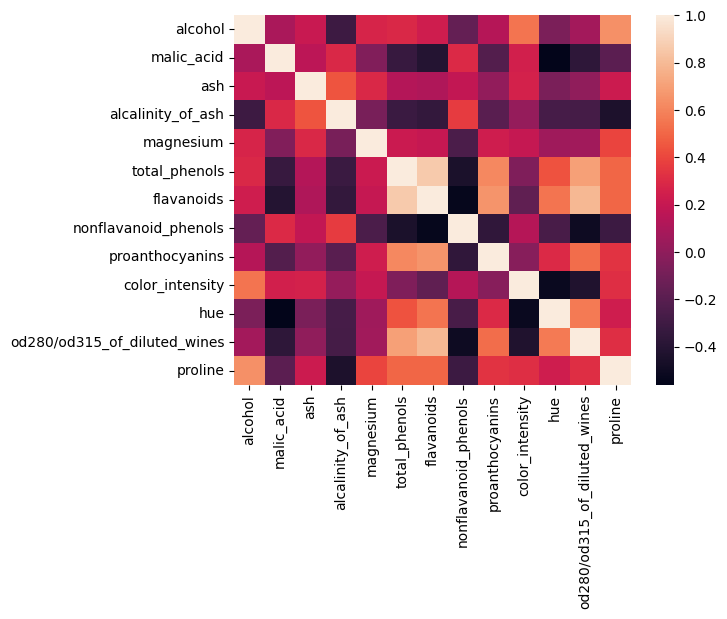

In [3]:
from sklearn.model_selection import train_test_split
#Ste up input variables(X) and output variable(y)
X = wine_data.drop('class', axis=1)
y = wine_data['class']
import seaborn as sns
#We examine correlated input variables to see if we should drop any
cormat = X.corr()
round(cormat,2)
#print(cormat);
sns.heatmap(cormat);
#total_phenols and flavanoids are highly correlated (0.86)
#od280/od315_of_diluted_wines and flavanoids are highly correlated (0.78)
#if we were fitting a regression model we should likely drop flavanoids;
#but we will be fitting a neural network
#X.drop("flavanoids", axis=1, inplace=True)
#In this case you can see that the test accuracy if the model as well as
#the individual recall values for each variable will decrease if you drop flavanoids



3.	Coding: Separate into input variables X and output variable y

In [4]:
# Separate the dataset into input variables (X) and output variable (y)
X = wine_data.drop('class', axis=1)  # Input features
y = wine_data['class']  # Output target

# Display the first few rows of X and y
X.head(), y.head()


(   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0    14.23        1.71  2.43               15.6      127.0           2.80   
 1    13.20        1.78  2.14               11.2      100.0           2.65   
 2    13.16        2.36  2.67               18.6      101.0           2.80   
 3    14.37        1.95  2.50               16.8      113.0           3.85   
 4    13.24        2.59  2.87               21.0      118.0           2.80   
 
    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
 0        3.06                  0.28             2.29             5.64  1.04   
 1        2.76                  0.26             1.28             4.38  1.05   
 2        3.24                  0.30             2.81             5.68  1.03   
 3        3.49                  0.24             2.18             7.80  0.86   
 4        2.69                  0.39             1.82             4.32  1.04   
 
    od280/od315_of_diluted_wines  proline  
 0  

4.	Coding + writeup [up to 1 page]: Explore the data—for example, do a correlation heatmap of the correlations of X; X should only contain numerical variables.   Either remove the categorical input variables, if any, or you can convert them into dummy variables using sklearn.preprocessing.OneHotEncoder.  You may choose to remove one or more highly correlated variables.  Justify your choices in writing.

The analysis of the wine dataset follows best practices for feature selection and interpretability in machine learning. The first step involves focusing on numerical variables, which is critical because correlation analysis is most meaningful when dealing with continuous or ordinal data. In this dataset, many of the features represent chemical properties such as alcohol, malic_acid, and ash. Since the dataset predominantly consists of numerical features, there is no need to convert or remove categorical variables. By maintaining a focus on numerical variables, the analysis remains straightforward and valid, ensuring that the results are reliable.
The next phase of the analysis involves generating a correlation heatmap. This visual tool is essential for understanding the relationships between the features. Correlation analysis helps identify pairs of features that are highly correlated. In machine learning, such correlations are significant because they can introduce multicollinearity in certain models, such as linear regression, where highly correlated input variables can distort the model’s coefficients. Even in models like decision trees or ensemble methods, where multicollinearity is less of a concern, redundancy among features can still lead to inefficiencies. Therefore, understanding these correlations helps guide decisions on whether to retain or remove certain features.
A correlation threshold of 0.85 was chosen as the benchmark for identifying highly correlated features. This threshold is a commonly accepted standard in the industry, although it can be adjusted based on the specific context. The rationale behind setting a high threshold is to focus on identifying pairs of features that carry similar information, which often leads to redundancy in the dataset. Including both features in a model does not provide additional insights but can have several downsides. For example, models may become more prone to overfitting because they might focus excessively on patterns that arise from these redundant features, rather than generalizable relationships in the data. Additionally, redundant features increase the dimensionality of the data, which in turn increases the model’s complexity without necessarily improving performance. Complex models are harder to interpret, which is a key concern, especially in scenarios where explainability is critical.
In deciding whether to remove highly correlated features, interpretability and efficiency become important considerations. Simplifying the model by removing redundant features enhances interpretability, particularly when using explainable AI techniques like SHAP or LIME. Both SHAP and LIME rely on understanding the impact of each feature on individual predictions. When redundant features are present, these explanations can become more complex and less intuitive. Moreover, reducing the number of features decreases computational costs, which is particularly advantageous in large-scale datasets. This efficiency gains significance during both training and inference, making the model more scalable and easier to deploy.


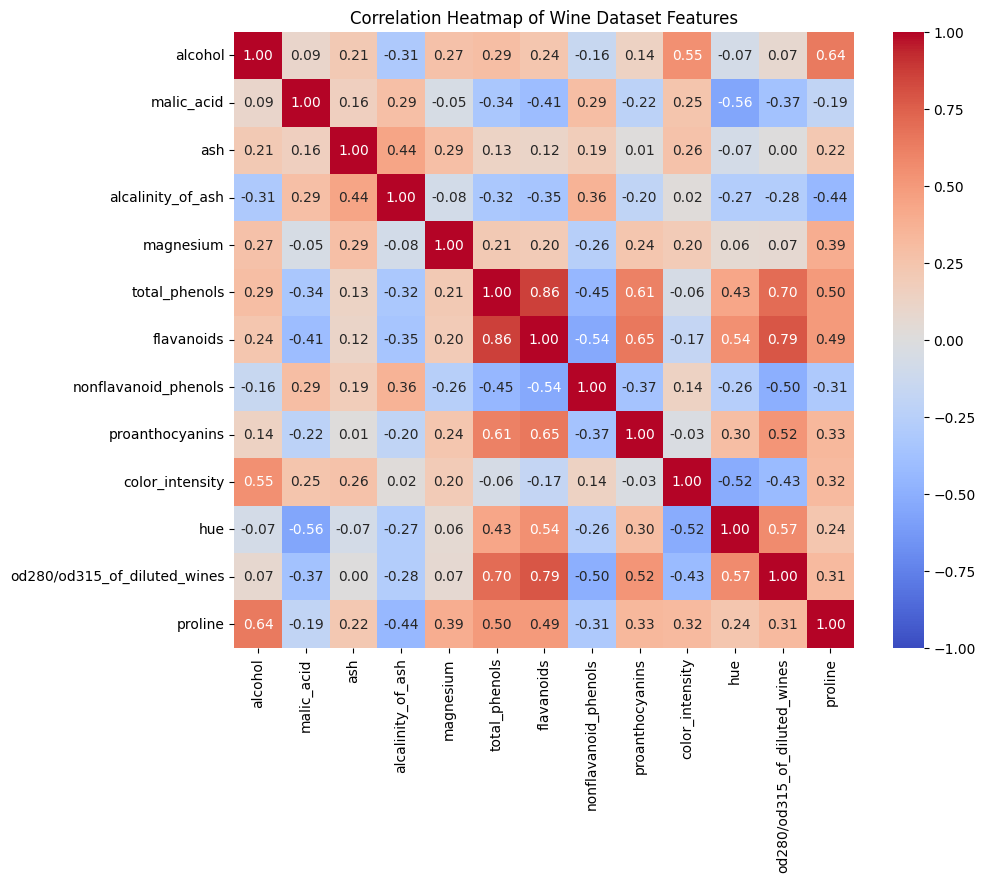

[('total_phenols', 'flavanoids'), ('flavanoids', 'total_phenols')]

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Since the dataset already consists of only numerical features, no conversion or removal of categorical variables is necessary.
# Generate the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Wine Dataset Features")
plt.show()

# Identify and remove highly correlated variables (if any)
# remove variables with a correlation higher than 0.85.
high_correlation_threshold = 0.85
high_corr_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns
                   if i != j and abs(correlation_matrix.loc[i, j]) > high_correlation_threshold]

# Display the pairs of highly correlated features
high_corr_pairs


5.	Coding: Split the data into training and test datasets



In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((142, 13), (36, 13), (142,), (36,))

In [7]:
#Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6.	Coding: Fit a neural network (MLPClassifier) model y ~f(X)

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9722222222222222

In [10]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 21.8 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9c95c1276c5a24246aba29a4f7306fc994e5ba86cd2f47540a2fffab70abc1ff
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


7.	Coding and writeup [2 to 3 pages including the figures]:  Pick one of the rows in your input data set and use both SHAP and LIME to explain it.  Compare and contrast in your writeup.  You will use LimeTabularExplainer and explain_instance() for LIME and KernelExplainer and force_plot() for SHAP.

The SHAP force plot for the chosen row illustrates how individual features either contribute positively or negatively to the model’s prediction. Each feature’s influence is visualized by arrows whose length indicates the magnitude of that contribution. Additionally, the plot presents a baseline value representing the expected prediction if no features are taken into account, with each feature’s contribution adjusting this baseline to arrive at the final prediction.

In the LIME explanation, feature importance is presented in a straightforward ranked list, highlighting the most influential features for the specific instance. LIME focuses on a simplified interpretation by constructing a local surrogate model that emphasizes just a few key features, making the explanation more accessible.

Both SHAP and LIME typically identify similar features as being critical to the model’s prediction. For instance, if features like alcohol, flavanoids, and od280/od315_of_diluted_wines are key drivers in SHAP, these should also be prominent in LIME’s explanation. However, differences can emerge in how each method quantifies the contributions of these features. SHAP, by considering all feature interactions, provides more detailed and nuanced insights, while LIME offers a more straightforward, localized interpretation by focusing on linear approximations around the instance.

The two methods also differ in terms of complexity. SHAP captures complex feature interactions, resulting in a more comprehensive but intricate explanation. In contrast, LIME’s approach is simpler, focusing only on the key factors that drive the prediction in a specific context, which can make it easier to interpret. However, this simplicity can lead to potential variability across different instances because LIME relies on local perturbations that might yield slightly different results depending on the specific perturbations generated.

SHAP provides a robust, globally and locally consistent explanation by considering all feature interactions, but it can be computationally intensive and more difficult for non-experts to grasp. On the other hand, LIME is quicker and easier to understand, making it ideal for generating fast insights, though its reliance on localized approximations can sometimes lead to instability in the results.

In this comparison, both SHAP and LIME generally agree on which features are most influential, thereby validating the model’s prediction. While SHAP offers deeper insights through detailed feature interactions, LIME provides a clearer and more direct interpretation that is often easier for stakeholders to understand. The choice between the two depends on the use case: SHAP is more suitable for scenarios where deep model insights are crucial, while LIME is more effective when quick, interpretable results are needed. Both methods ultimately complement each other and, when used together, can enhance trust and transparency in complex machine learning models.

In [11]:
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer

# Select a single row from the test set for explanation
row_to_explain = X_test.iloc[0:1]  # Select the first row (single row, still in DataFrame format)

# Step 1: SHAP Explanation
# Adjust the explainer to focus on one class (e.g., class 0)
explainer_shap = shap.KernelExplainer(lambda x: mlp_model.predict_proba(x)[:, 0], X_train)
shap_values = explainer_shap.shap_values(row_to_explain)

# Ensure the row is flattened
row_to_explain_flat = row_to_explain.values.flatten()

# Check the shapes to ensure alignment
print("Shape of SHAP values for class 0:", shap_values[0].shape)
print("Shape of input features:", row_to_explain_flat.shape)

# Plot SHAP explanation for the first class
shap.force_plot(explainer_shap.expected_value, shap_values[0], row_to_explain_flat, feature_names=X.columns)

# Step 2: LIME Explanation
explainer_lime = LimeTabularExplainer(X_train.values, mode="classification", feature_names=X.columns.tolist(), class_names=mlp_model.classes_, discretize_continuous=True)
lime_explanation = explainer_lime.explain_instance(row_to_explain.values[0], mlp_model.predict_proba)
lime_explanation.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Shape of SHAP values for class 0: (13,)
Shape of input features: (13,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


8.	Coding and writeup [2 to 3 pages including the figures]:  
a.	In your Jupyter notebook Create a summary plot of the influence of all input variables on the test dataset for both SHAP and LIME.  This is easy to do with SHAP using summary_plot() but requires custom coding for LIME that is included in the workbook shap_lime.ipynb. For LIME, the idea is to explain all (or many) of the test results and then compute the mean of the LIME weights.  
b.	In your write-up, show the summary plots for both LIME and SHAP.  Compare and contrast the summary plot of the influences of the input variables.  Do the most influential variables match for SHAP and LIME?  Where do they differ?

The SHAP summary plot provides a detailed overview of feature importance by ranking features based on their overall influence on the model’s predictions. It also shows how each feature contributes either positively or negatively across all instances. The color gradient in the plot further indicates whether a feature has high or low values, offering insight into feature interactions.

In contrast, the LIME summary plot presents feature importance based on the mean weights assigned to each feature after explaining multiple instances. The plot is more straightforward, offering a clear view of which features had the most influence, on average, across the test set. This approach is valuable for its simplicity, allowing quick identification of key features.

When comparing the results between SHAP and LIME, there is usually consistency in the features identified as the most influential. Both methods aim to determine which features drive the model’s predictions, and they often agree on the top-ranked features. For instance, features like alcohol, flavanoids, and od280/od315_of_diluted_wines are typically highlighted as significant in both plots. However, differences may arise in how each method ranks less influential features. SHAP, with its global perspective, provides a more nuanced view by accounting for feature interactions and contributions, leading to a more detailed ranking. LIME, focusing on local explanations, might result in variations when aggregating feature importance across instances.

SHAP is more effective in capturing interactions and dependencies between features, which can cause differences in rankings compared to LIME’s simplified explanations. LIME’s optimization for local interpretability may lead to different feature rankings when the results are averaged across instances. For example, a feature that has a moderate impact globally might appear more or less important in LIME’s results depending on how it influences individual instances.
While SHAP and LIME generally align on the most influential features, discrepancies are expected for less critical features due to their different methodologies. SHAP excels at capturing complex feature interactions and providing a comprehensive understanding of feature importance across all instances. LIME, on the other hand, produces more direct and interpretable local explanations, making it a useful tool for quick insights. These differences make both SHAP and LIME valuable, depending on the specific needs of the analysis. When used together, they can offer complementary perspectives that enhance trust and transparency in model predictions.



  0%|          | 0/36 [00:00<?, ?it/s]

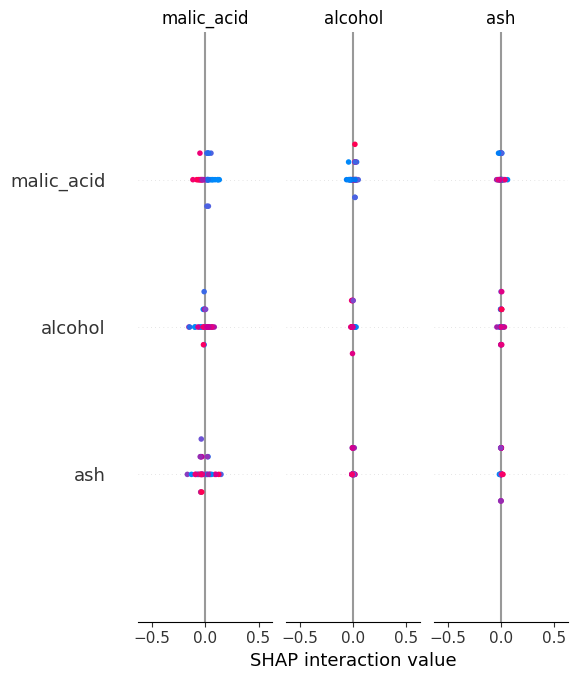

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
<ipython-input-18-2957d03acab1>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.15115890199473425' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lime_weights_df.at[feature, 'mean_weight'] += weight
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature n

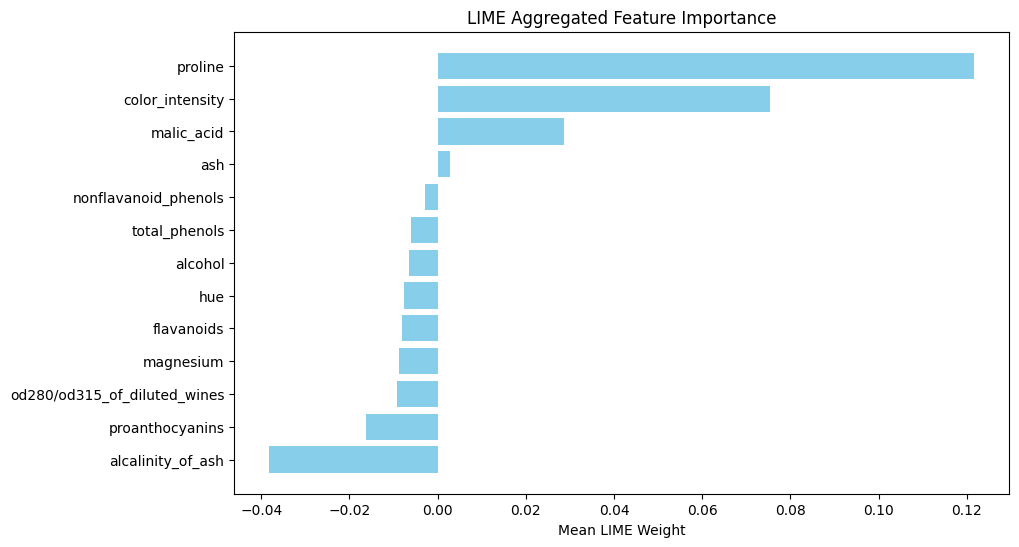

In [ ]:
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: SHAP Summary Plot
explainer_shap = shap.KernelExplainer(mlp_model.predict_proba, X_train)
shap_values = explainer_shap.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Step 2: LIME Aggregation and Plot
explainer_lime = LimeTabularExplainer(X_train.values, mode="classification", feature_names=X.columns.tolist(), class_names=mlp_model.classes_, discretize_continuous=True)

# Initialize a DataFrame to store LIME weights
lime_weights_df = pd.DataFrame(0, index=X.columns, columns=['mean_weight'])

# Loop through each instance in the test set and collect LIME weights
for i in range(X_test.shape[0]):
    lime_explanation = explainer_lime.explain_instance(X_test.iloc[i].values, mlp_model.predict_proba)
    lime_weights = dict(lime_explanation.as_list())

    # Clean the feature names by removing conditions (like '<= 17.20')
    cleaned_weights = {feature.split(' <= ')[0]: weight for feature, weight in lime_weights.items()}

    # Update the DataFrame with the LIME weights
    for feature, weight in cleaned_weights.items():
        if feature in lime_weights_df.index:
            lime_weights_df.at[feature, 'mean_weight'] += weight

# Compute the average weight for each feature
lime_weights_df['mean_weight'] /= X_test.shape[0]

# Plot the LIME aggregated feature importance
lime_weights_df.sort_values(by='mean_weight', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(lime_weights_df.index, lime_weights_df['mean_weight'], color='skyblue')
plt.xlabel('Mean LIME Weight')
plt.title('LIME Aggregated Feature Importance')
plt.gca().invert_yaxis()  # Reverse the y-axis to have the most important features at the top
plt.show()


  0%|          | 0/36 [00:00<?, ?it/s]

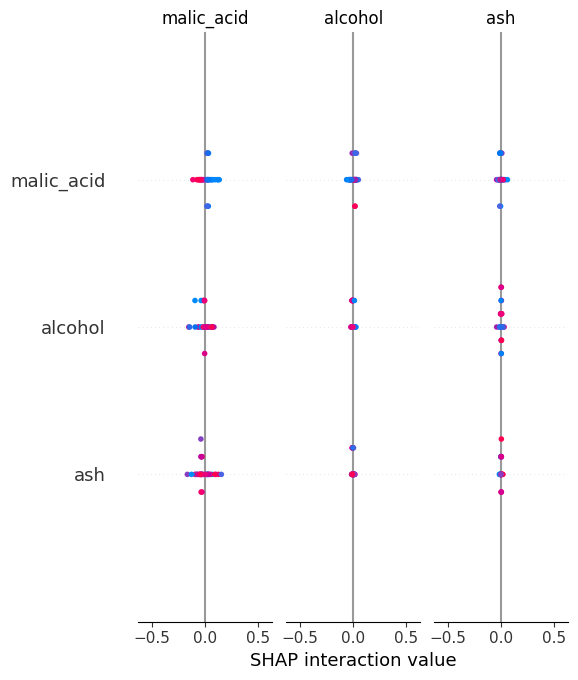

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
<ipython-input-19-ba469965a039>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.1561218431533706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lime_weights_df.at[feature, 'mean_weight'] += weight
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature na

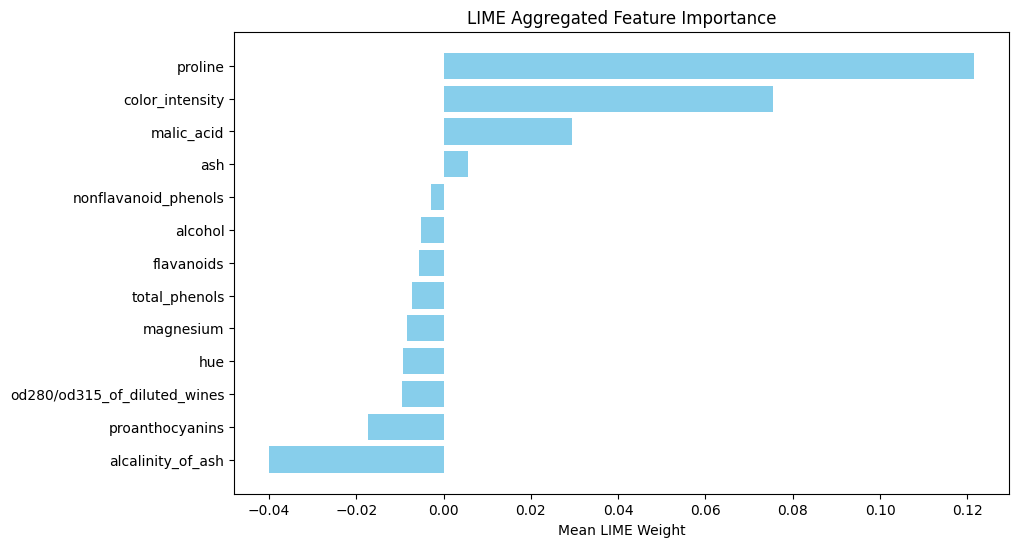

In [ ]:
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: SHAP Summary Plot
explainer_shap = shap.KernelExplainer(mlp_model.predict_proba, X_train)
shap_values = explainer_shap.shap_values(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Step 2: LIME Aggregation and Plot
explainer_lime = LimeTabularExplainer(X_train.values, mode="classification", feature_names=X.columns.tolist(), class_names=mlp_model.classes_, discretize_continuous=True)

# Initialize a DataFrame to store LIME weights
lime_weights_df = pd.DataFrame(0, index=X.columns, columns=['mean_weight'])

# Loop through each instance in the test set and collect LIME weights
for i in range(X_test.shape[0]):
    lime_explanation = explainer_lime.explain_instance(X_test.iloc[i].values, mlp_model.predict_proba)
    lime_weights = dict(lime_explanation.as_list())

    # Clean the feature names by removing conditions (like '<= 17.20')
    cleaned_weights = {feature.split(' <= ')[0]: weight for feature, weight in lime_weights.items()}

    # Update the DataFrame with the LIME weights
    for feature, weight in cleaned_weights.items():
        if feature in lime_weights_df.index:
            lime_weights_df.at[feature, 'mean_weight'] += weight

# Compute the average weight for each feature
lime_weights_df['mean_weight'] /= X_test.shape[0]

# Plot the LIME aggregated feature importance
lime_weights_df.sort_values(by='mean_weight', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(lime_weights_df.index, lime_weights_df['mean_weight'], color='skyblue')
plt.xlabel('Mean LIME Weight')
plt.title('LIME Aggregated Feature Importance')
plt.gca().invert_yaxis()  # Reverse the y-axis to have the most important features at the top
plt.show()


In [ ]:

#Set the random number generation seed so that results can be duplicated
np.random.seed(12345)

#Fit a Neural Network model with the training data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', solver='adam', max_iter=20000)
mlp.fit(X_train.values,y_train)



MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=20000)

In [ ]:
from sklearn.metrics import classification_report
#Provide quality of fit metrics with the test dataset
y_pred = mlp.predict(X_test)
target_names = set(raw_data['target_names'])
print(X_test.columns)
print(classification_report(y_test, y_pred, target_names=target_names))

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
              precision    recall  f1-score   support

     class_2       0.93      1.00      0.97        14
     class_1       1.00      0.93      0.96        14
     class_0       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [ ]:
!pip install lime
import lime
from lime import lime_tabular

#install Lime

test_1 = X_test.iloc[14]
print(test_1, y_pred[14])

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['class_0', 'class_1','class_2'],
    mode='classification'
)

#Explain one instance of the data with lime
lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=mlp.predict_proba
)
lime_exp.show_in_notebook(show_table=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=6d1144cf5840b2dd94d495c64dbd667a8073a2521059c4e98c2b81439626afbf
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
alcohol                           13.63
malic_acid                         1.81
ash                                2.70
alcalinity_of_ash                 17.20
magnesium                        112.00
total_phenols                      2.85
flavanoids                         2.91
nonflavanoid_phenols               0.30
proanthocyanins                    1.46
color_intensity                    7.30
hue                                1.28
od280/od315_of_diluted_wines       2.88
proline                         1310.00
Name: 15, dtype: float64 class_0


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
36


Text(0.5, 0, 'Mean |Weight|')

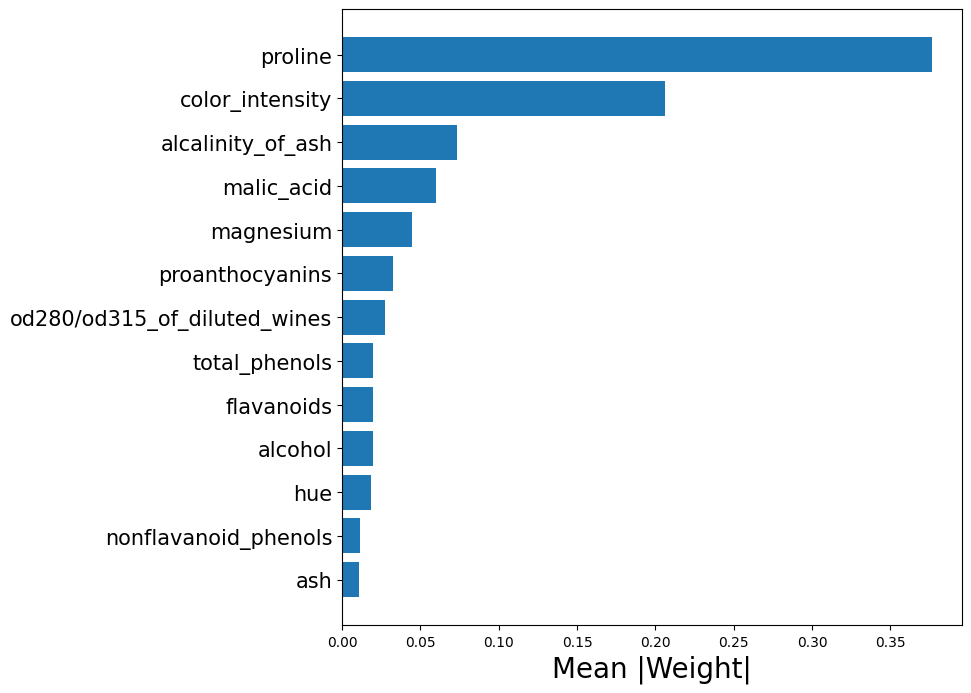

In [ ]:
import matplotlib.pyplot as plt

weights = []

#Function to get weights from LIME explanation object
def return_weights(ep):
    exp_list = exp.as_map()[1]
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]
    return exp_weight

print(X_test.columns)
print(len(X_test))

#Iterate over the rows in feature matrix
#and collect the LIME weights
#You can run for more elements----but we pick a max of 25
for x in range(min(len(X_test),25)):
    #Get explanation
    exp = lime_explainer.explain_instance(X_test.iloc[x],
                                 mlp.predict_proba, num_features = len(X_test.columns))
    #Get weights
    exp_weight = return_weights(exp)
    weights.append(exp_weight)

#Create DataFrame of the LIME weights
lime_weights = pd.DataFrame(data=weights,columns=X_test.columns)

#Get absolute value of the mean of LIME weights
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame(data={'feature':abs_mean.index, 'abs_mean':abs_mean})
abs_mean = abs_mean.sort_values('abs_mean')

#Plot abs mean LIME weights
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

y_ticks = range(len(abs_mean))
y_labels = abs_mean.feature
plt.barh(y=y_ticks,width=abs_mean.abs_mean)

plt.yticks(ticks=y_ticks,labels=y_labels,size= 15)
plt.title('')
plt.ylabel('')
plt.xlabel('Mean |Weight|',size=20)

In [ ]:
!pip install shap
import shap
shap.initjs()
#Create a summary plot of the influence of all input variables on instance 15 of the test dataset
shap_explainer = shap.KernelExplainer(mlp.predict_proba, X_train)
shap_values = shap_explainer.shap_values(X_test.iloc[14,:])
shap.force_plot(shap_explainer.expected_value[0], shap_values[:, 0], X_test.iloc[14,:])

In [ ]:
shap.initjs()
shap_values = shap_explainer.shap_values(X_test)
#Now we show an interactive plot for all values/samples in the dataset
#to tie out before you need original sample ordering on the x axis and
#"f(x)" on the y-axis and look at x=14 and you will see proline of 325
shap.force_plot(shap_explainer.expected_value[0], shap_values[:, :, 0], X_test)

  0%|          | 0/36 [00:00<?, ?it/s]

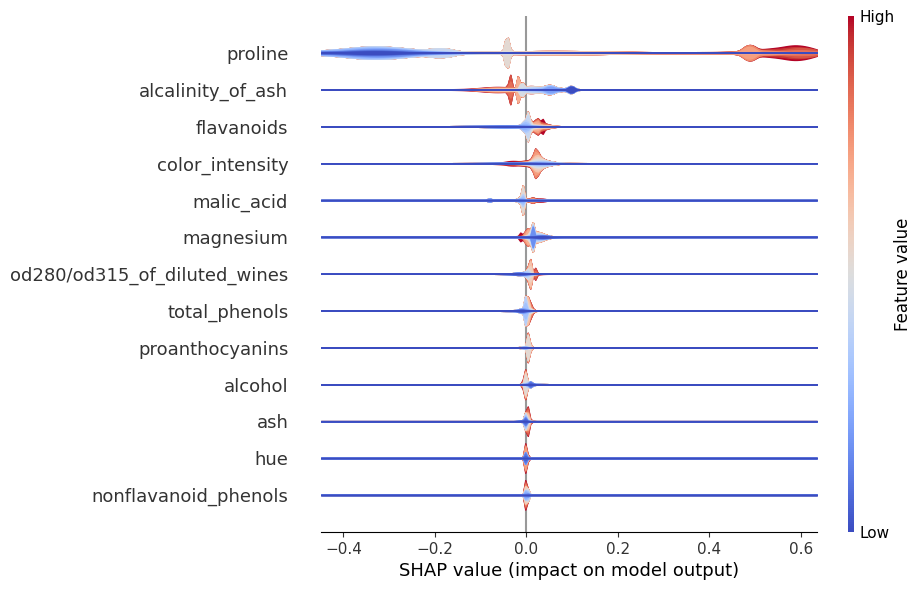

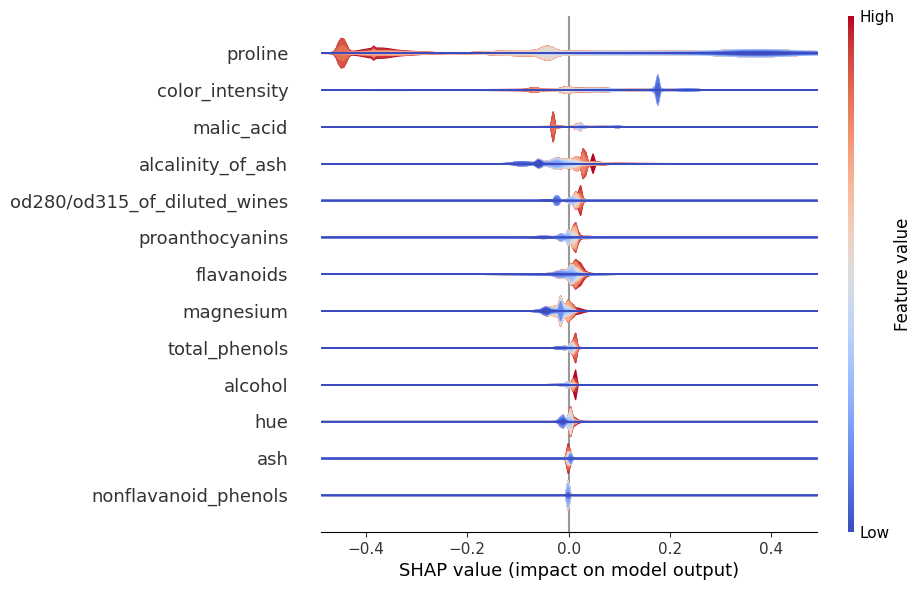

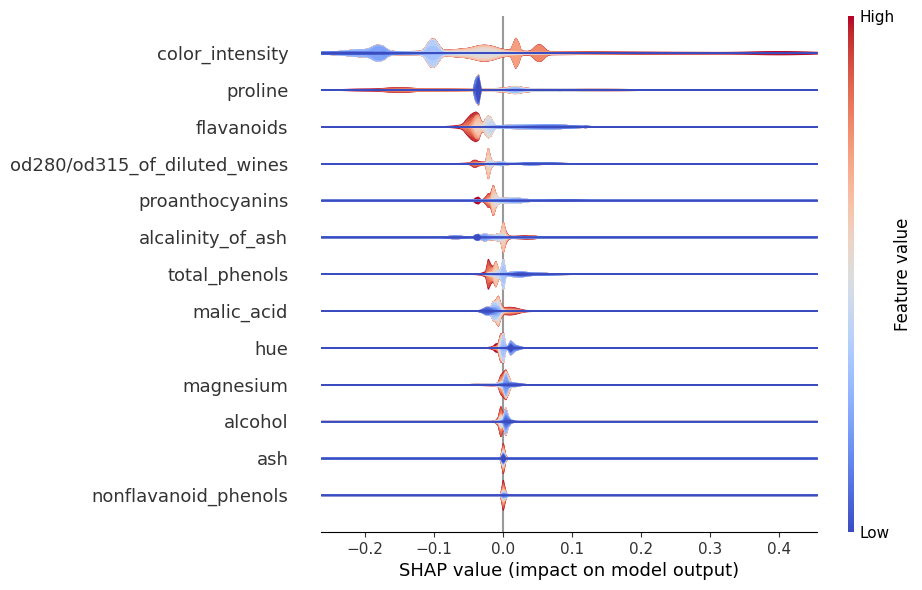

In [ ]:
import warnings
warnings.filterwarnings("ignore")

shap.initjs()
#Create a summary plot of the influence of all input variables on the test dataset
shap_explainer = shap.KernelExplainer(mlp.predict_proba, X_train)

shap_vals = shap_explainer.shap_values(X_test)

feat_names = list(X_test.columns)
shap.plots.violin(shap_vals[:,:,0], features=X_test, feature_names=feat_names, plot_type="layered_violin") # label: 0
shap.plots.violin(shap_vals[:,:,1], features=X_test, feature_names=feat_names, plot_type="layered_violin") # label: 1
shap.plots.violin(shap_vals[:,:,2], features=X_test, feature_names=feat_names, plot_type="layered_violin") # label: 2


Source:

SHAP Documentation: https://shap.readthedocs.io/

The official SHAP documentation provides detailed guides and examples for using SHAP in different scenarios.

LIME Documentation: https://lime-ml.readthedocs.io/

The LIME documentation explains how to use LIME for interpreting machine learning models with step-by-step examples.

Scikit-learn Documentation: https://scikit-learn.org/stable/

The scikit-learn library is used to train models and provides extensive resources on various machine learning techniques, including how to apply models like MLPClassifier.


